In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/drive/MyDrive/Rural.pcap_Flow.csv')




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df.dropna()

In [ ]:
df= df.drop(['Flow ID' , 'Dst IP' , 'Timestamp' ,'Label'] , axis=1)

In [ ]:
df.rename({'Src IP':'Label'} , axis=1 , inplace=True)


In [ ]:
df['Label'] = ["UDP flood" if x=="192.168.0.8"
               else "SYN flood" if x=="192.168.0.6"
               else "Slowries" if x=="192.168.0.7"
               else "Benign" for x in df['Label']]

In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index
np.where(np.isinf(df[numeric_features]))

(array([5427, 5427]), array([16, 17]))

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[5427]])

In [ ]:
class_0 = df[df['Label'] == 'UDP flood']
class_1 = df[df['Label'] == 'Slowries']
class_2 =df[df['Label'] == 'SYN flood']
class_3 =df[df['Label'] == 'Benign']

In [ ]:
class_count_2= 200000

In [ ]:
class_1_over = class_1.sample(class_count_2, replace=True)
class_3_over = class_3.sample(class_count_2, replace=True)

df = pd.concat([class_1_over, class_0 , class_2, class_3_over])

# print the number of class count
df['Label'].value_counts()

UDP flood    372095
SYN flood    244145
Slowries     200000
Benign       200000
Name: Label, dtype: int64

In [ ]:
df['Label'] = [0 if x=="192.168.0.8"
               else 1 if x=="192.168.0.6"
               else 2 if x=="192.168.0.7"
               else 3 for x in df['Label']]

In [ ]:
df['Label'].value_counts()

UDP flood    372095
SYN flood    244145
Slowries     200000
Benign       200000
Name: Label, dtype: int64

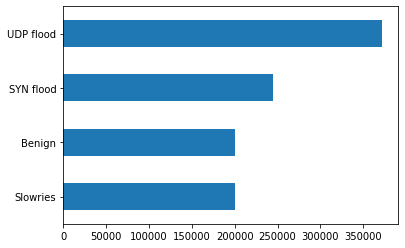

In [ ]:
df['Label'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(X_train, y_train)
counter = Counter(y)
print(counter)

In [ ]:
from sklearn.datasets import make_classification

from collections import Counter
X, y = make_classification(n_samples=800000, n_features=79, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

Counter({0: 792000, 1: 8000})


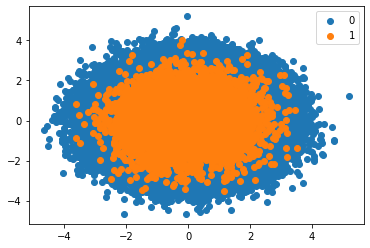

In [ ]:
from matplotlib import pyplot
from numpy import where
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
class_0 = df[df['Label'] == 'UDP flood']
class_1 = df[df['Label'] == 'Slowries']
class_2 =df[df['Label'] == 'SYN flood']
class_3 =df[df['Label'] == 'Benign']
smote = SMOTE()


class_0 , class_1 = smote.fit_resample(class_0, class_1)

Counter(class_1)



TypeError: ignored

In [ ]:

x , y = df.loc[: , df.columns != 'Label'] , df['Label']
# Only select rows that have all finite entries
x = x[np.all(np.isfinite(x), axis=1)]


In [ ]:
x.shape

(646426, 79)

In [ ]:
y.shape

(646427,)

In [ ]:
y = np.arange(646426).reshape(646426,)
y.shape

(646426,)

In [ ]:
df

In [ ]:
x = df.dtypes[df.dtypes!='object'].index
y =df.dtypes[df.dtypes !='int64'].index
df[y]

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
# fit target and predictor variable

smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x, y)

counter = Counter(y_smote)
print(counter)

In [ ]:
y_smote.shape

(646426,)

In [ ]:
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
x = x.apply(lambda x: (x*255))

In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,646427.000000,646427.000000,646427.000000,6.464270e+05,646427.000000,646427.000000,6.464270e+05,6.464270e+05,646427.000000,646427.000000,...,646427.000000,646427.0,6.464270e+05,6.464270e+05,6.464270e+05,6.464270e+05,6.464270e+05,6.464270e+05,6.464270e+05,6.464270e+05
mean,32737.310841,116.546985,12.366917,4.419472e+07,3.029700,2.047226,1.028422e+03,1.263208e+02,1.006751,0.203901,...,1.164413,0.0,2.170473e+05,3.700925e+03,2.207531e+05,2.141960e+05,2.561481e+07,7.164401e+06,3.226794e+07,2.017717e+07
std,19289.749180,1304.271384,5.433866,3.730901e+07,236.206041,82.360368,2.136418e+05,1.989667e+04,30.398451,7.826370,...,235.918252,0.0,9.993382e+05,1.892843e+05,1.057226e+06,9.785823e+05,2.453132e+07,1.289631e+07,2.862086e+07,2.462530e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,15596.000000,80.000000,6.000000,1.195430e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.951232e+06,0.000000e+00,1.029194e+07,6.218182e+06
50%,32706.000000,80.000000,17.000000,3.298283e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.988077e+07,0.000000e+00,2.556428e+07,1.165640e+07
75%,50130.000000,80.000000,17.000000,7.617877e+07,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.342140e+07,1.017482e+07,4.558263e+07,2.447608e+07
max,65535.000000,64282.000000,17.000000,1.200000e+08,102165.000000,31017.000000,8.019192e+07,9.277063e+06,1460.000000,1400.000000,...,102165.000000,0.0,7.466293e+07,4.438326e+07,7.466293e+07,7.466293e+07,1.200000e+08,7.777785e+07,1.200000e+08,1.200000e+08


In [ ]:
df0=df[df['Label']=='Benign'].drop(['Label'],axis=1)
df1=df[df['Label']=='UDP flood'].drop(['Label'],axis=1)
df2=df[df['Label']=='SYN flood'].drop(['Label'],axis=1)
df3=df[df['Label']=='Slowries'].drop(['Label'],axis=1)

In [ ]:
# Generate 79*79 color images for class 0 (BENIGN)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=237:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 1 (UDP attack)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):
    count=count+1
    if count<=237:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 2 (SYN attack)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):
    count=count+1
    if count<=237:
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 3 (Slowries attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):
    count=count+1
    if count<=237:
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

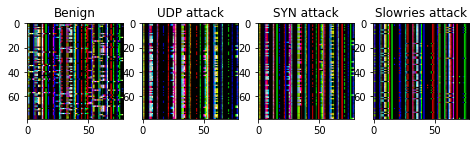

In [ ]:
# Read the images for each category
img1 = Image.open('./train/0/237.png')
img2 = Image.open('./train/1/237.png')
img3 = Image.open('./train/2/237.png')
img4 = Image.open('./train/3/237.png')


plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Benign")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("UDP attack")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("SYN attack")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Slowries attack")
plt.show()  # display it

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

4268


In [ ]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//3	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

In [ ]:
# The size of test set
Numbers

1422

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
#"categorical": 2D output (aka. list of numbers of length N), [0, 0, 1, 0], which is a one-hot encoding (only one number is 1/ "hot") representing the donkey. This is for mutually exclusive labels
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 2846 images belonging to 4 classes.
Found 1422 images belonging to 4 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        #plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('diagram.jpg')
        plt.show()

In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
    )

Epoch 1/20
 6/23 [======>.......................] - ETA: 10s - loss: 1.3609 - accuracy: 0.3358

23/23 [==============================] - ETA: 0s - loss: 1.0896 - accuracy: 0.4852
Epoch 1: val_accuracy improved from -inf to 0.87201, saving model to ./model_own.h5
23/23 [==============================] - 19s 842ms/step - loss: 1.0896 - accuracy: 0.4852 - val_loss: 0.5222 - val_accuracy: 0.8720
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.3676 - accuracy: 0.8521
Epoch 2: val_accuracy improved from 0.87201 to 0.92053, saving model to ./model_own.h5
23/23 [==============================] - 19s 836ms/step - loss: 0.3676 - accuracy: 0.8521 - val_loss: 0.1814 - val_accuracy: 0.9205
Epoch 3/20
23/23 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9378
Epoch 3: val_accuracy improved from 0.92053 to 1.00000, saving model to ./model_own.h5
23/23 [==============================] - 19s 806ms/step - loss: 0.1821 - accuracy: 0.9378 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 4/20
23/23 [==============================] - ETA: 0s - loss: 0.0231 

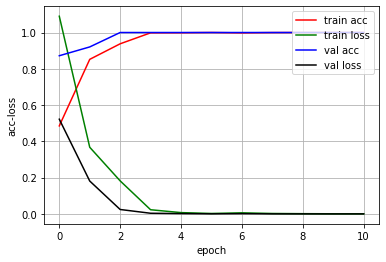

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=4,epochs=20)
history_this.loss_plot('epoch')
#history_this.loss_plot('batch')
plt.show()

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)


In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[saveBestModel,history_this],
    )

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
#compute other parameters
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1422 images belonging to 4 classes.


In [ ]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: '0', 1: '1', 2: '2', 3: '3'}


In [ ]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

0 ./test_224/0/68781.png


In [ ]:
#load model 1: CNN
CNN_model=load_model('./model_own.h5')

1/1 [==============================] - 0s 198ms/step
Predicted result for the first image: 0
Confidence level: 0.98077583


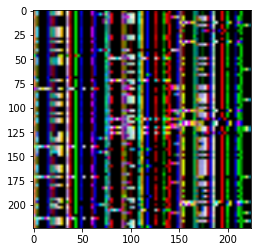

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=CNN_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
    res=label[np.argmax(CNN_model_batch,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 18ms/step
CPU times: user 1min 10s, sys: 3.32 s, total: 1min 13s
Wall time: 1min 20s


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3']
print(classification_report(test_laels, predict, target_names=target_names , digits=5))

CNN accuracy: 0.9985935302390999
precision: 0.9986030980606025
recall: 0.9985935302390999
f1: 0.9985939153584884
[[292   0   0   0]
 [  0 519   0   0]
 [  2   0 348   0]
 [  0   0   0 261]]
              precision    recall  f1-score   support

           0    0.99320   1.00000   0.99659       292
           1    1.00000   1.00000   1.00000       519
           2    1.00000   0.99429   0.99713       350
           3    1.00000   1.00000   1.00000       261

    accuracy                        0.99859      1422
   macro avg    0.99830   0.99857   0.99843      1422
weighted avg    0.99860   0.99859   0.99859      1422



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC : ',ACC)

TPR :  [1.         1.         0.99428571 1.        ]
TNR :  [0.99823009 1.         1.         1.        ]
PPV :  [0.99319728 1.         1.         1.        ]
FPR :  [0.00176991 0.         0.         0.        ]
FNR :  [0.         0.         0.00571429 0.        ]
ACC :  [0.99859353 1.         0.99859353 1.        ]
